Missing values in X:
[1 0 1]
Missing values in y:
0
Missing values in X after imputation:
[0 0 0]
Mean Squared Error (MSE): 0.2536029275685747
Root Mean Squared Error (RMSE): 0.503590039187209
R-squared (R²): nan
Mean Absolute Error (MAE): 0.503590039187209


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


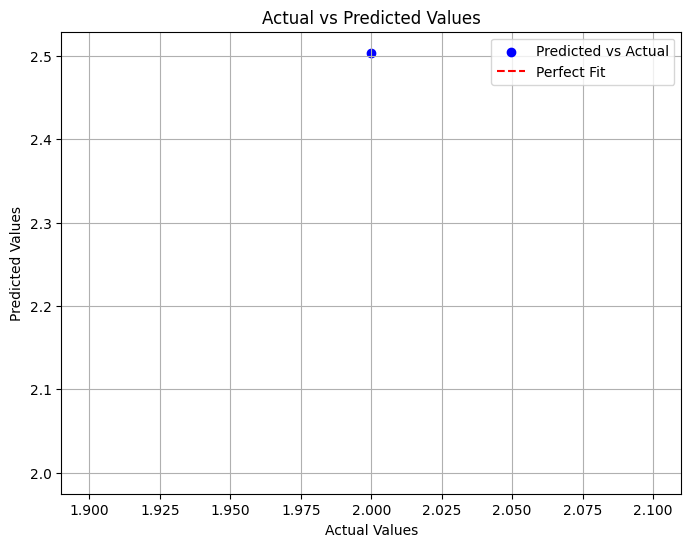

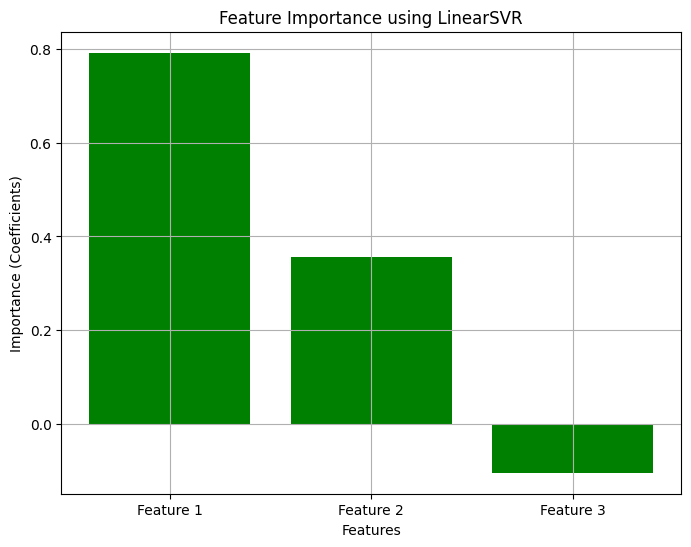

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.svm import LinearSVR  # Used for feature importance

# Sample data (replace with your own dataset)
# Example data with NaN values
X = np.array([[1, 2, np.nan], [4, 5, 6], [7, 8, 9], [np.nan, 3, 4], [10, 11, 12]])
y = np.array([1, 2, 3, 4, 5])

# Step 1: Check for missing values
print("Missing values in X:")
print(np.isnan(X).sum(axis=0))  # Check for missing values in each column of X

print("Missing values in y:")
print(np.isnan(y).sum())  # Check for missing values in y

# Step 2: Handle missing values using SimpleImputer (mean imputation in this case)
imputer = SimpleImputer(strategy='mean')

# Impute missing values in X (features)
X_imputed = imputer.fit_transform(X)

# Check again for missing values after imputation
print("Missing values in X after imputation:")
print(np.isnan(X_imputed).sum(axis=0))  # Should now be zero for all columns

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Step 4: Scale the data (Standardization)
scaler = StandardScaler()

# Apply scaling to both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Train the SVR model
svm_model = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)

# Fit the model to the training data
svm_model.fit(X_train_scaled, y_train)

# Step 6: Make predictions
y_pred = svm_model.predict(X_test_scaled)

# Step 7: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")
print(f"Mean Absolute Error (MAE): {mae}")

# Step 8: Plotting actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# Step 9: Feature Importance (Using LinearSVR for feature importance)
# If you want to see feature importance using a linear model like LinearSVR:
linear_svr = LinearSVR(max_iter=10000)
linear_svr.fit(X_train_scaled, y_train)

# Get the feature importance (coefficients)
feature_importance = linear_svr.coef_

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.bar(range(X_train_scaled.shape[1]), feature_importance, color='green')
plt.xticks(range(X_train_scaled.shape[1]), ['Feature 1', 'Feature 2', 'Feature 3'])  # Adjust labels accordingly
plt.xlabel('Features')
plt.ylabel('Importance (Coefficients)')
plt.title('Feature Importance using LinearSVR')
plt.grid(True)
plt.show()

